<a href="https://colab.research.google.com/github/call-me-jot/ECE9063-DA-Final-Project/blob/master/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/call-me-jot/ECE9063-DA-Final-Project.git

Cloning into 'ECE9063-DA-Final-Project'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 56 (delta 23), reused 9 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (56/56), 20.16 MiB | 10.83 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [2]:
%cd ECE9063-DA-Final-Project/

/content/ECE9063-DA-Final-Project


In [3]:
!git checkout -b feature/eda

Switched to a new branch 'feature/eda'


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!git status

On branch feature/eda
Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	deleted:    Welcome_to_Colaboratory.ipynb
	deleted:    blues00000.png

no changes added to commit (use "git add" and/or "git commit -a")


In [6]:
df = pd.read_json("train.json")
df.head(5)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


**Analysis**

In [7]:
rows = len(df)
columns = len(df.columns)
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 49352
Number of columns: 15


In [8]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 7.0+ MB


**EDA Plots**

What is a Seaborn Distplot?
A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables.

The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it. The Distplot depicts the data by a histogram and a line in combination to it.

Ref Link: https://www.digitalocean.com/community/tutorials/seaborn-distplot

**Outlier Detector**

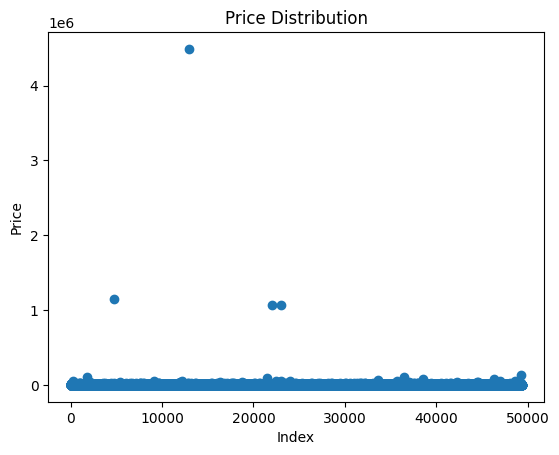

In [13]:
df_price = df['price'].values
plt.scatter(range(df_price.shape[0]), df_price)
plt.title("Price Distribution")
plt.xlabel("Index")
plt.ylabel("Price")
plt.show()

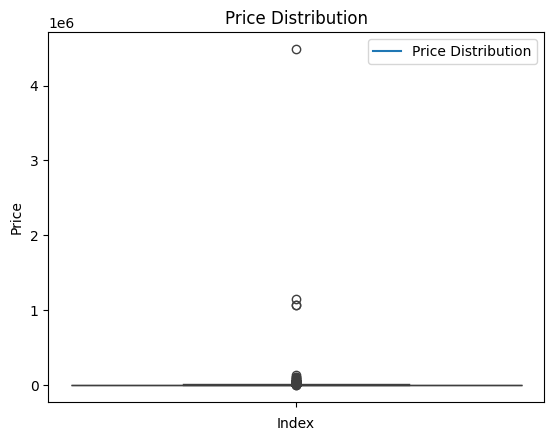

In [14]:
sns.boxplot(y='price', data=df)
plt.plot([], label='Price Distribution')
plt.title("Price Distribution")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.show()

In [15]:
#Removal of outlier
upper_bound = np.percentile(df["price"].values, 99.9)
df_filtered = df[df["price"] <= upper_bound]

In [16]:
df_filtered["date"] = pd.to_datetime(df_filtered["created"]).dt.date
df_filtered["year"] = pd.to_datetime(df_filtered["date"]).dt.year
df_filtered["month"] = pd.to_datetime(df_filtered["date"]).dt.month
df_filtered["day"] = pd.to_datetime(df_filtered["date"]).dt.day
df_filtered["hour"] = pd.to_datetime(df_filtered["date"]).dt.hour
df_filtered["weekday"] = pd.to_datetime(df_filtered["date"]).dt.weekday
df_filtered["quarter"] = pd.to_datetime(df_filtered["date"]).dt.quarter
df_filtered.head(5)

<ipython-input-16-200f75a3fb14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["date"] = pd.to_datetime(df_filtered["created"]).dt.date
<ipython-input-16-200f75a3fb14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["year"] = pd.to_datetime(df_filtered["date"]).dt.year
<ipython-input-16-200f75a3fb14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,...,price,street_address,interest_level,date,year,month,day,hour,weekday,quarter
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,...,2400,145 Borinquen Place,medium,2016-06-16,2016,6,16,0,3,2
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,...,3800,230 East 44th,low,2016-06-01,2016,6,1,0,2,2
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,...,3495,405 East 56th Street,medium,2016-06-14,2016,6,14,0,1,2
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,...,3000,792 Metropolitan Avenue,medium,2016-06-24,2016,6,24,0,4,2
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,...,2795,340 East 34th Street,low,2016-06-28,2016,6,28,0,1,2


**Dist Plot**

<ipython-input-17-5ed8f3c5c05d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtered["price"])


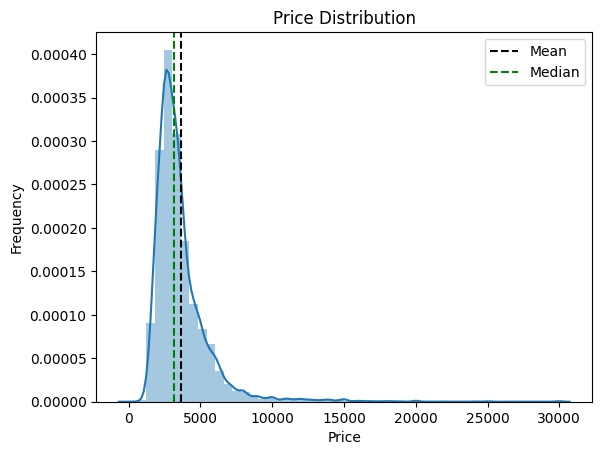

In [17]:
sns.distplot(df_filtered["price"])

#add mean and variance to plot
plt.axvline(df_filtered["price"].mean(), color='k', linestyle='dashed', label='Mean')
plt.axvline(df_filtered["price"].median(), color='g', linestyle='dashed', label='Median')

plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**Observation**
The distribution of prices is right-skewed, meaning there are number of higher-priced houses pulling the mean above the median.

Median price is better indicator of the central tendency for this dataset.

**Reg Plot with Scatter Representation & Regression Line**

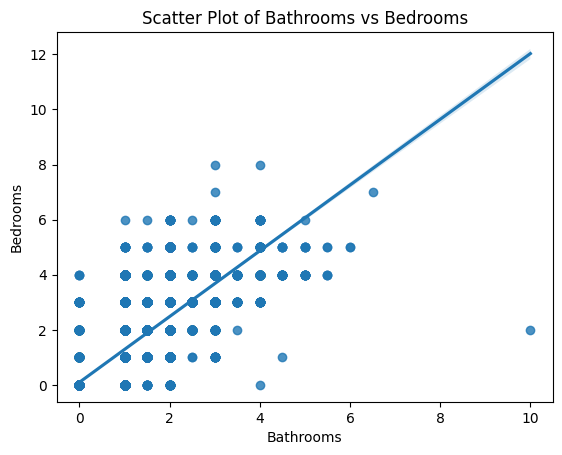

In [19]:
sns.regplot(x='bathrooms', y='bedrooms', data=df_filtered, scatter=True, fit_reg=True)
plt.title("Scatter Plot of Bathrooms vs Bedrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Bedrooms")
plt.show()

**Observation**
Trend of bathroom is increasing as bedrooms are increasing. Most of the data-points are for smaller count of bedrooms.

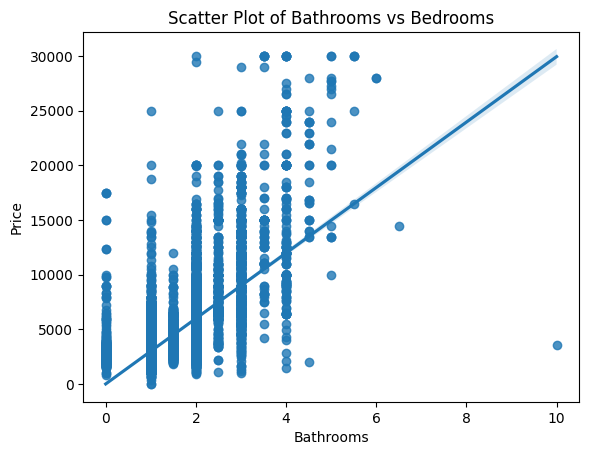

In [20]:
sns.regplot(x='bathrooms', y='price', data=df_filtered, scatter=True, fit_reg=True)
plt.title("Scatter Plot of Bathrooms vs Bedrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.show()

**Observation**
Same trend is seen for bathrooms and price, i.e, positive correlation. And most of the dataset are on the lower end of the dataset

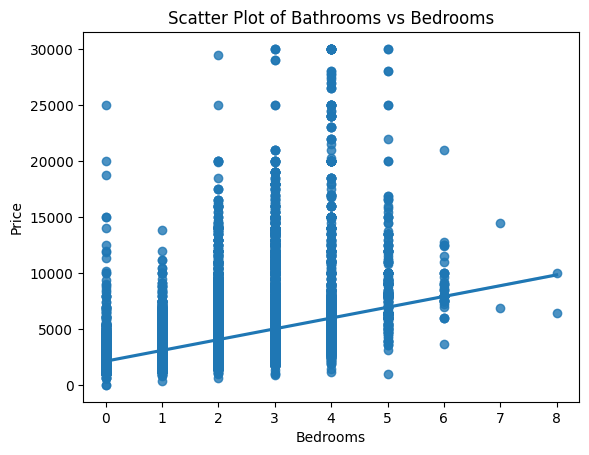

In [22]:
sns.regplot(x='bedrooms', y='price', data=df_filtered, scatter=True, fit_reg=True)
plt.title("Scatter Plot of Bathrooms vs Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

**Observation**
This is also showing positive correlation between the number of bedrooms and the price of rental properties. However, there is interesting fact that with the same number of bedrooms, price varies drastically. As other factors also play crucial role in determining the rental prices, unlike between price and bathrooms.